# Retrieve total aerosol optical depth from the Atmosphere Data Store and visualise 2019 anomalies in Australia

<img src="https://ads.atmosphere.copernicus.eu/themes/custom/baby_blue/logo.svg" width=140> 
This notebook demonstrates how to retrieve NetCDF data from the Atmosphere Data Store (https://ads.atmosphere.copernicus.eu/) (ADS) and anomaly map using xarray and Cartopy libraries.

First, let's define some general purpose variables

In [14]:
DATADIR = '../eodata/cams'
DATAFILE = 'cams_dust_20210623.nc'
DOWNLOAD = True
leadtime_hours = [ str(lh) for lh in range(121)]

Next, we will retrieve the data from the ADS by using the cdsapi Python library. 

https://ads.atmosphere.copernicus.eu/api-how-to 

**To be able to run the data retrieval example below you will need to register on the Atmosphere Data Store (https://ads.atmosphere.copernicus.eu/) and then visit this page: https://ads.atmosphere.copernicus.eu/api-how-to to obtain the API authentication key.**

If you want to speed up the process, you can use the files which are already available on the LTPY training platform.

In [15]:
if DOWNLOAD:

    import cdsapi
    # to suppress SSL warnings
    import urllib3
    urllib3.disable_warnings()

    # enter your ADS authentication key
    URL = "https://ads.atmosphere.copernicus.eu/api/v2"
    KEY = "3512:52600066-3b0b-4213-bb5d-2d9b686b7fce"
    c = cdsapi.Client(url=URL, key=KEY)
 
    c.retrieve('cams-global-atmospheric-composition-forecasts',
    {
        'variable': 'dust_aerosol_optical_depth_550nm',
        'date': '2021-06-23',
        'time': '00:00',
        'leadtime_hour': leadtime_hours,
        'type': 'forecast',
        'format': 'netcdf',
    },        
    f'{DATADIR}/{DATAFILE}')


2021-06-24 09:07:45,464 INFO Welcome to the CDS
2021-06-24 09:07:45,466 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-global-atmospheric-composition-forecasts
2021-06-24 09:07:45,648 INFO Request is queued
2021-06-24 09:07:46,694 INFO Request is running
2021-06-24 09:07:53,957 INFO Request is completed
2021-06-24 09:07:53,959 INFO Downloading https://download-0003.copernicus-atmosphere.eu/cache-compute-0003/cache/data7/adaptor.mars_constrained.internal-1624525670.2106955-19366-17-142362f6-aa99-48fb-84d6-181b55d23568.nc to ../eodata/cams/cams_dust_20210623.nc (93.7M)
2021-06-24 09:08:00,139 INFO Download rate 15.2M/s  


Let's inspect one file

In [17]:
import xarray as xr
ds = xr.open_dataset(f'{DATADIR}/{DATAFILE}')
ds.time

<xarray.DataArray 'time' (time: 121)>
array(['2021-06-23T00:00:00.000000000', '2021-06-23T01:00:00.000000000',
       '2021-06-23T02:00:00.000000000', '2021-06-23T03:00:00.000000000',
       '2021-06-23T04:00:00.000000000', '2021-06-23T05:00:00.000000000',
       '2021-06-23T06:00:00.000000000', '2021-06-23T07:00:00.000000000',
       '2021-06-23T08:00:00.000000000', '2021-06-23T09:00:00.000000000',
       '2021-06-23T10:00:00.000000000', '2021-06-23T11:00:00.000000000',
       '2021-06-23T12:00:00.000000000', '2021-06-23T13:00:00.000000000',
       '2021-06-23T14:00:00.000000000', '2021-06-23T15:00:00.000000000',
       '2021-06-23T16:00:00.000000000', '2021-06-23T17:00:00.000000000',
       '2021-06-23T18:00:00.000000000', '2021-06-23T19:00:00.000000000',
       '2021-06-23T20:00:00.000000000', '2021-06-23T21:00:00.000000000',
       '2021-06-23T22:00:00.000000000', '2021-06-23T23:00:00.000000000',
       '2021-06-24T00:00:00.000000000', '2021-06-24T01:00:00.000000000',
       '2021-06-24T02:00:00.000000000', '2021-06-24T03:00:00.000000000',
       '2021-06-24T04:00:00.000000000', '2021-06-24T05:00:00.000000000',
       '2021-06-24T06:00:00.000000000', '2021-06-24T07:00:00.000000000',
       '2021-06-24T08:00:00.000000000', '2021-06-24T09:00:00.000000000',
       '2021-06-24T10:00:00.000000000', '2021-06-24T11:00:00.000000000',
       '2021-06-24T12:00:00.000000000', '2021-06-24T13:00:00.000000000',
       '2021-06-24T14:00:00.000000000', '2021-06-24T15:00:00.000000000',
       '2021-06-24T16:00:00.000000000', '2021-06-24T17:00:00.000000000',
       '2021-06-24T18:00:00.000000000', '2021-06-24T19:00:00.000000000',
       '2021-06-24T20:00:00.000000000', '2021-06-24T21:00:00.000000000',
       '2021-06-24T22:00:00.000000000', '2021-06-24T23:00:00.000000000',
       '2021-06-25T00:00:00.000000000', '2021-06-25T01:00:00.000000000',
       '2021-06-25T02:00:00.000000000', '2021-06-25T03:00:00.000000000',
       '2021-06-25T04:00:00.000000000', '2021-06-25T05:00:00.000000000',
       '2021-06-25T06:00:00.000000000', '2021-06-25T07:00:00.000000000',
       '2021-06-25T08:00:00.000000000', '2021-06-25T09:00:00.000000000',
       '2021-06-25T10:00:00.000000000', '2021-06-25T11:00:00.000000000',
       '2021-06-25T12:00:00.000000000', '2021-06-25T13:00:00.000000000',
       '2021-06-25T14:00:00.000000000', '2021-06-25T15:00:00.000000000',
       '2021-06-25T16:00:00.000000000', '2021-06-25T17:00:00.000000000',
       '2021-06-25T18:00:00.000000000', '2021-06-25T19:00:00.000000000',
       '2021-06-25T20:00:00.000000000', '2021-06-25T21:00:00.000000000',
       '2021-06-25T22:00:00.000000000', '2021-06-25T23:00:00.000000000',
       '2021-06-26T00:00:00.000000000', '2021-06-26T01:00:00.000000000',
       '2021-06-26T02:00:00.000000000', '2021-06-26T03:00:00.000000000',
       '2021-06-26T04:00:00.000000000', '2021-06-26T05:00:00.000000000',
       '2021-06-26T06:00:00.000000000', '2021-06-26T07:00:00.000000000',
       '2021-06-26T08:00:00.000000000', '2021-06-26T09:00:00.000000000',
       '2021-06-26T10:00:00.000000000', '2021-06-26T11:00:00.000000000',
       '2021-06-26T12:00:00.000000000', '2021-06-26T13:00:00.000000000',
       '2021-06-26T14:00:00.000000000', '2021-06-26T15:00:00.000000000',
       '2021-06-26T16:00:00.000000000', '2021-06-26T17:00:00.000000000',
       '2021-06-26T18:00:00.000000000', '2021-06-26T19:00:00.000000000',
       '2021-06-26T20:00:00.000000000', '2021-06-26T21:00:00.000000000',
       '2021-06-26T22:00:00.000000000', '2021-06-26T23:00:00.000000000',
       '2021-06-27T00:00:00.000000000', '2021-06-27T01:00:00.000000000',
       '2021-06-27T02:00:00.000000000', '2021-06-27T03:00:00.000000000',
       '2021-06-27T04:00:00.000000000', '2021-06-27T05:00:00.000000000',
       '2021-06-27T06:00:00.000000000', '2021-06-27T07:00:00.000000000',
       '2021-06-27T08:00:00.000000000', '2021-06-27T09:00:00.000000000',
       '2021-06-27T10:00:00.000000000', '2021-06-27T11:00:00.000000000',
       '2021-06-27T1

Let's plot one dust aerosol optical depth forecast

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


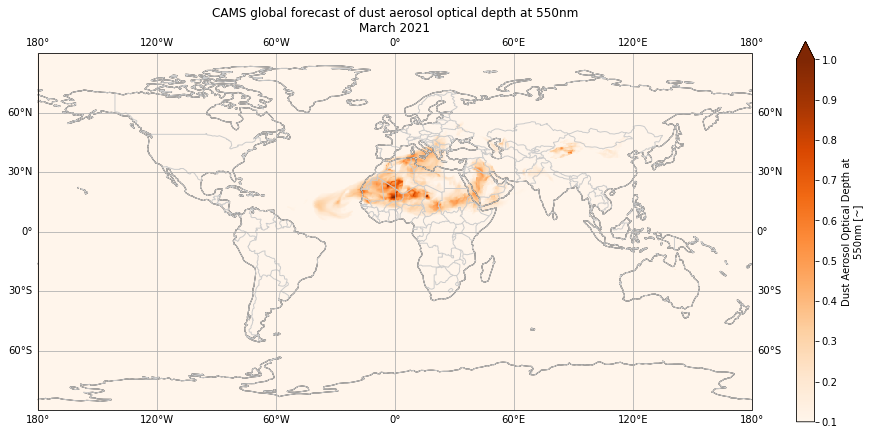

In [18]:
import matplotlib.pyplot as plt

import cartopy
import cartopy.crs as ccrs

map_proj = ccrs.PlateCarree()
BORDER_COLOUR = "#cccccc"

f, ax = plt.subplots(figsize=(16, 7), subplot_kw=dict(projection=map_proj))

p = ds.duaod550[72,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cmap="Oranges", vmin=0.1, vmax=1, extend='max')
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color=BORDER_COLOUR)
ax.coastlines(color=BORDER_COLOUR)
# ax.set_extent((105, 160, -50, 0))
ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree() )
plt.title("CAMS global forecast of dust aerosol optical depth at 550nm\nMarch 2021")
plt.show()